In [1]:
pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 4.6 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     -------------------------------------- 163.0/163.0 kB 3.2 MB/s eta 0:00:00
     -------------------------------------- 55.4/55.4 kB 960.5 kB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 7.3 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ---------------------------------------- 1.0/1.0 MB 8.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn


     -------------------------------------- 293.3/293.3 kB 1.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "admin",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [17]:
con = PostgresConnection().getConnection()

successfully connected to database


# Q1: Find the division wise total_sale_price joining fact table and respective dimension table

In [37]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [38]:
records

[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [45]:
df_q1 = pd.DataFrame(records, columns=['division', 'sales'])
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [46]:
df_q1 =df_q1.drop(7)

In [47]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [48]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  

In [49]:
changetype(df_q1)

In [52]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [57]:
df_q1=df_q1.set_index(['division'])
df_q1

,sales
division,
BARISAL,7520343.75
CHITTAGONG,19763595.00
DHAKA,40764619.75
KHULNA,11311610.50
RAJSHAHI,12099196.00
RANGPUR,8429836.50
SYLHET,5512234.25


<Axes: ylabel='sales'>

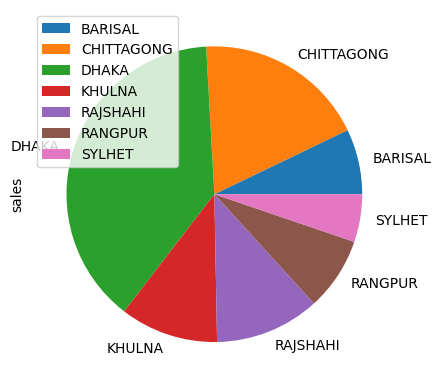

In [58]:
df_q1.plot.pie(y='sales')

<Axes: xlabel='division'>

<Figure size 1000x500 with 0 Axes>

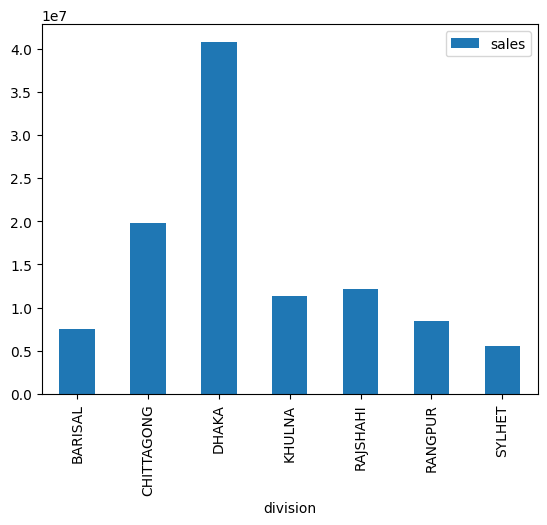

In [60]:
plt.figure(figsize=(10,5))
df_q1.plot.bar(y='sales')

In [61]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [62]:
records

[(2014, Decimal('14334731.25')),
 (2015, Decimal('15095720.25')),
 (2016, Decimal('14976508.25')),
 (2017, Decimal('15015806.00')),
 (2018, Decimal('15108197.25')),
 (2019, Decimal('14949510.25')),
 (2020, Decimal('15037190.25')),
 (2021, Decimal('883772.25')),
 (None, Decimal('105401435.75'))]